In [13]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [14]:
# Read CSV file
df = pd.read_csv("K Means _ CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
# Print columns names of the dataframe
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [16]:
# Selecting a subset of the original dataset
temp1 = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'PURCHASES_FREQUENCY', 'MINIMUM_PAYMENTS']]
temp1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,MINIMUM_PAYMENTS
0,40.900749,0.818182,95.40,0.166667,139.509787
1,3202.467416,0.909091,0.00,0.000000,1072.340217
2,2495.148862,1.000000,773.17,1.000000,627.284787
3,1666.670542,0.636364,1499.00,0.083333,NaN
4,817.714335,1.000000,16.00,0.083333,244.791237


In [17]:
# Drop rows which have na values present
temp1 = temp1.dropna(axis=0, how="any")
temp1.shape

(8637, 5)

In [18]:
# Create a list of clusters with k value ranging from 1 to 10
cluster = []
for k in range(1,11):
    kmean = KMeans(n_clusters=k).fit(temp1)
    cluster.append(kmean.inertia_)

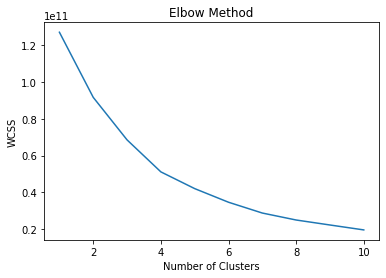

In [19]:
# Create Elbow plot from the list of clusters
plt.plot(range(1,11), cluster)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

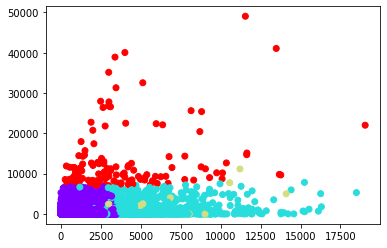

In [21]:
# Choosing k = 4 from elbow plot, plot the cluster plot
kmean=KMeans(n_clusters=4)
kmean.fit(temp1)
identified_clusters = kmean.fit_predict(temp1)
temp1["Predicted Value"] = identified_clusters
plt.scatter(x=temp1["BALANCE"],y=temp1['PURCHASES'],c=temp1['Predicted Value'],cmap='rainbow')